# 02_preprocessing.ipynb


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from geopy.distance import geodesic

# Load dataset


In [32]:
df = pd.read_csv('../data/deliverytime.csv')

# Drop unneeded columns


In [33]:
df.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)

# Encode categorical features


In [34]:
label_encoders = {}
categorical_columns = ['Type_of_order', 'Type_of_vehicle']
for col in categorical_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Calculate distance between coordinates


In [35]:
def calculate_distance(row):
    origin = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    destination = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(origin, destination).km

df['distance_km'] = df.apply(calculate_distance, axis=1)
df['log_distance'] = np.log1p(df['distance_km'])

# Show correlation before adding interaction features


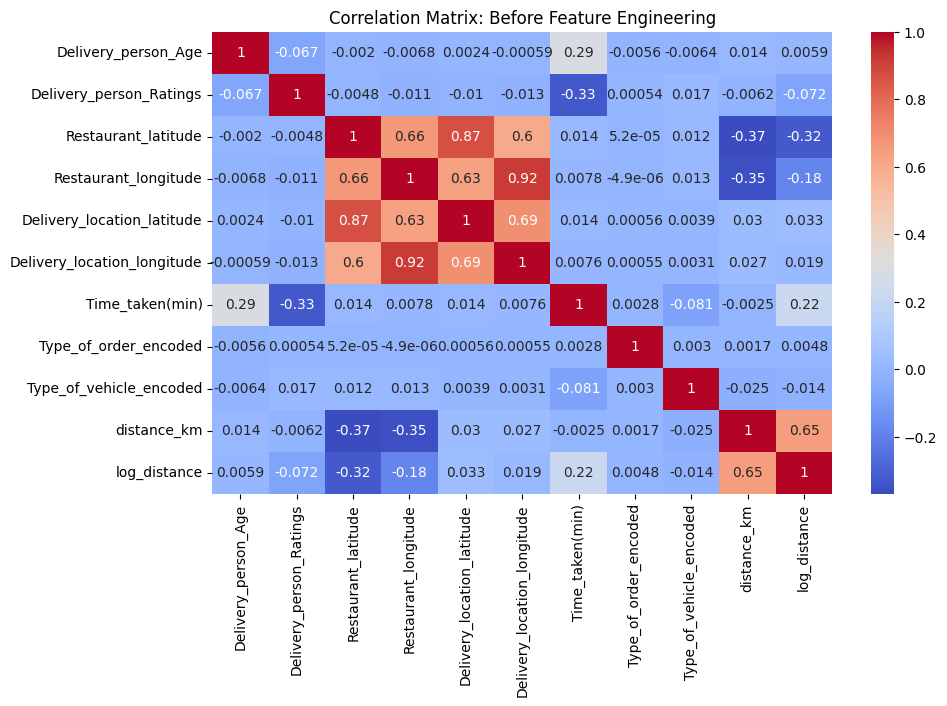

In [36]:
numeric_df_before = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df_before.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Before Feature Engineering")
plt.savefig('../reports/images/features/correlation_matrix_before_fe.png', dpi=100)
plt.show()

# Add interaction features (new)


In [37]:
df['distance_x_rating'] = df['log_distance'] * df['Delivery_person_Ratings']
df['speed_estimate'] = df['log_distance'] / df['Time_taken(min)']
df['age_x_rating'] = df['Delivery_person_Age'] * df['Delivery_person_Ratings']

# Show correlation after adding interaction features


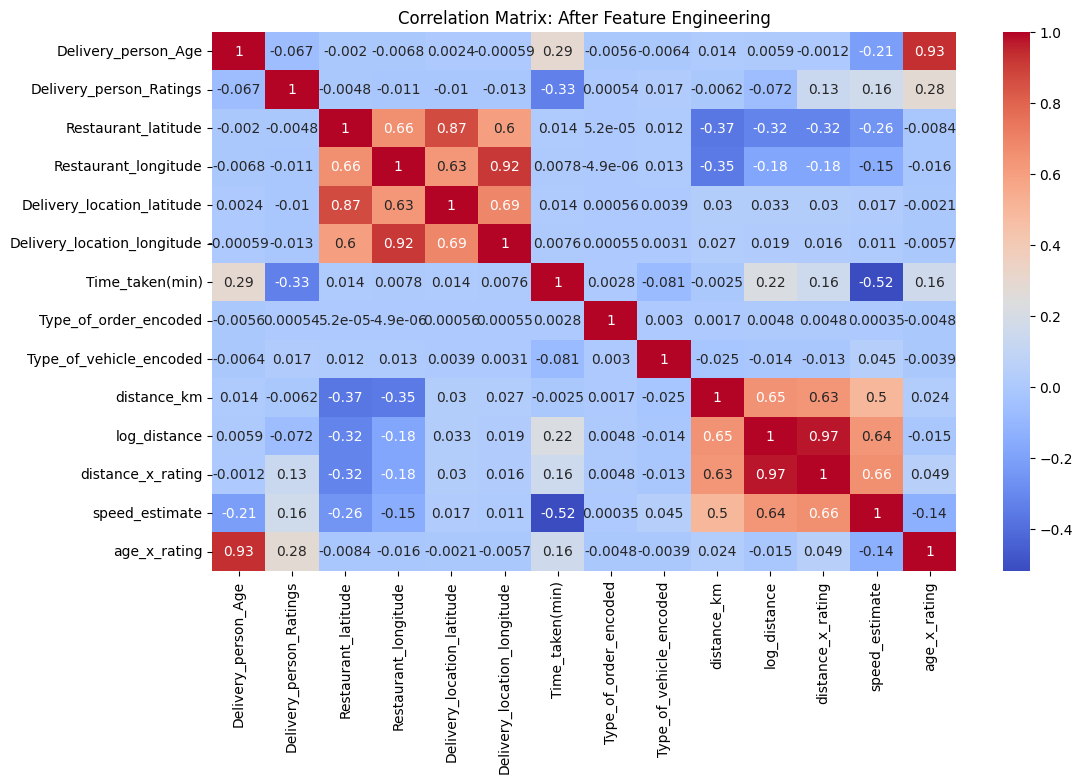

In [38]:
numeric_df_after = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 7))
sns.heatmap(numeric_df_after.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: After Feature Engineering")
plt.savefig('../reports/images/features/correlation_matrix_after_fe.png', dpi=100)
plt.show()

# Drop original coordinates (optional)


In [39]:
df.drop(['Restaurant_latitude', 'Restaurant_longitude',
         'Delivery_location_latitude', 'Delivery_location_longitude',
         'Type_of_order', 'Type_of_vehicle'], axis=1, inplace=True)

# Save cleaned data


In [40]:
df.to_csv('../data/deliverytime_cleaned.csv', index=False)
print("✅ Preprocessing complete. Cleaned data saved to deliverytime_cleaned.csv")

✅ Preprocessing complete. Cleaned data saved to deliverytime_cleaned.csv
